In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './../scripts')

In [2]:
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.figure import figaspect
import time

import spat_ori_network as network
import sim_util as su
import ricciardi as ric
import integrate as integ

def imshowbar(fig,ax,A,**kwargs):
    imsh = ax.imshow(A,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(imsh, cax=cax, orientation='vertical')

# Read Base Results Files

In [40]:
max_njob = 200

res_dict = {}
id_res_dict = {}

nsim = 0
for njob in range(max_njob):
    try:
        with open('./../results/results_base_'+str(njob)+'.pkl', 'rb') as handle:
            this_res_dict = pickle.load(handle)
        max_rep = max(list(this_res_dict.keys())) + 1
        for idx_rep in range(max_rep):
            res_dict[nsim] = this_res_dict[idx_rep]
            res_dict[nsim]['id'] = (njob,idx_rep)
            id_res_dict[(njob,idx_rep)] = this_res_dict[idx_rep]
            nsim += 1
    except:
        pass

print(nsim)

1311


In [41]:
prms = np.zeros((nsim,11))
inputs = np.zeros((nsim,9))
costs = np.zeros((nsim))

for idx_sim in range(nsim):
    prms[idx_sim] = np.array(list(res_dict[idx_sim]['prms'].values()))
    inputs[idx_sim] = np.concatenate(([res_dict[idx_sim]['best_eX']],[res_dict[idx_sim]['best_bX']],
                                      res_dict[idx_sim]['best_aXs']))
    costs[idx_sim] = res_dict[idx_sim]['best_cost']

In [42]:
idx_min = np.argmin(costs)

print(res_dict[idx_min]['id'])
print(res_dict[idx_min]['prms'])
print(res_dict[idx_min]['best_eX'])
print(res_dict[idx_min]['best_bX'])
print(res_dict[idx_min]['best_aXs'])
print(res_dict[idx_min]['best_means'])
print(res_dict[idx_min]['best_stds'])
print(res_dict[idx_min]['best_cost'])

(118, 5)
{'SrfE': 12.940111969332282, 'SrfI': 19.459208800703315, 'SrfF': 20, 'SoriE': 36.907244273244515, 'SoriI': 33.51951281695162, 'SoriF': 43.928905500358894, 'fEE': 0.886025501863603, 'fEI': 1.2361959979943369, 'fIE': 0.7503831441376321, 'fII': 1.0810860686494903, 'fFI': 0.8912578013409655}
0.49999999999847367
2.6102168236880745
[0.         0.25481409 0.37694752 0.53751669 0.56795482 1.52808744
 3.46419408]
[ 6.62042035  7.23251091  7.5258884   7.91159263  7.98470826 10.29104898
 15.88062207]
[ 5.68310787  6.3092617   6.60937976  7.00394586  7.07874139  9.43807213
 15.02580984]
0.9938180626068223


# Read Opto Results Files

In [87]:
max_njob = 200

res_dict = {}

nsim = 0
for njob in range(max_njob):
    try:
        with open('./../results/results_opto_'+str(njob)+'.pkl', 'rb') as handle:
            this_res_dict = pickle.load(handle)
        max_rep = max(list(this_res_dict.keys())) + 1
        for idx_rep in range(max_rep):
            res_dict[nsim] = this_res_dict[idx_rep]
            res_dict[nsim]['id'] = (njob,idx_rep)
            nsim += 1
    except:
        pass

print(nsim)

813


In [88]:
prms = np.zeros((nsim,11))
inputs = np.zeros((nsim,2))
costs = np.zeros((nsim))

for idx_sim in range(nsim):
    prms[idx_sim] = np.array(list(res_dict[idx_sim]['prms'].values()))
    inputs[idx_sim] = np.concatenate(([res_dict[idx_sim]['best_L']],[res_dict[idx_sim]['best_CVL']]))
    costs[idx_sim] = res_dict[idx_sim]['best_cost'] + id_res_dict[res_dict[idx_sim]['id']]['best_cost']
    costs[idx_sim] *= 1e8 if res_dict[idx_min]['best_diff_means'][-1] > res_dict[idx_min]['best_diff_means'][0] \
        else 1

In [89]:
idx_min = np.argmin(costs)

print(res_dict[idx_min]['id'])
print(res_dict[idx_min]['prms'])
print(id_res_dict[res_dict[idx_sim]['id']]['best_eX'])
print(id_res_dict[res_dict[idx_sim]['id']]['best_bX'])
print(id_res_dict[res_dict[idx_sim]['id']]['best_aXs'])
print(res_dict[idx_min]['best_L'])
print(res_dict[idx_min]['best_CVL'])
print(id_res_dict[res_dict[idx_sim]['id']]['best_means'])
print(id_res_dict[res_dict[idx_sim]['id']]['best_stds'])
print(res_dict[idx_min]['best_opto_means'])
print(res_dict[idx_min]['best_opto_stds'])
print(res_dict[idx_min]['best_diff_means'])
print(res_dict[idx_min]['best_diff_stds'])
print(res_dict[idx_min]['best_norm_covs'])
# print(res_dict[idx_min]['best_cost'] + id_res_dict[res_dict[idx_sim]['id']]['best_cost'])
print(costs[idx_min])

(84, 0)
{'SrfE': 15.7538486994389, 'SrfI': 7.046622992595769, 'SrfF': 20, 'SoriE': 24.953877993731425, 'SoriI': 38.12048547450283, 'SoriF': 36.75758272019653, 'fEE': 0.9609543331794965, 'fEI': 1.086519954916826, 'fIE': 0.9911424325463908, 'fII': 1.2252079589178013, 'fFI': 1.2014852358170565}
0.49999999999262096
2.5595960598498584
[0.         0.38566975 0.57793687 0.8321163  0.87109781 2.25731141
 5.00923031]
2.23158283227162
1.778279414270379
[ 6.80984158  7.32339518  7.57941597  7.91787851  7.96978586  9.89367612
 14.52970854]
[ 5.69153654  6.30835027  6.61584911  7.02236625  7.08471059  9.4959045
 16.18880405]
[10.33878627 10.96994928 11.27091742 11.67574667 11.74358565 14.32587743
 20.07854425]
[10.06069272 10.4790371  10.69050148 10.98620252 11.03695812 13.17753959
 18.73136926]
[3.95992366 4.07144156 4.1213966  4.18550426 4.19593014 4.5316352
 4.98703814]
[8.2034326  8.29458033 8.33565555 8.38860427 8.39722868 8.67952918
 9.07073767]
[0.04174232 0.04753108 0.05052136 0.05471933 0.

# Read Comb Results Files

In [90]:
max_njob = 200

res_dict = {}

nsim = 0
for njob in range(max_njob):
    try:
        with open('./../results/results_comb_'+str(njob)+'.pkl', 'rb') as handle:
            this_res_dict = pickle.load(handle)
        max_rep = max(list(this_res_dict.keys())) + 1
        for idx_rep in range(max_rep):
            res_dict[nsim] = this_res_dict[idx_rep]
            res_dict[nsim]['id'] = (njob,idx_rep)
            nsim += 1
    except:
        pass

print(nsim)

507


In [91]:
prms = np.zeros((nsim,13))
inputs = np.zeros((nsim,9))
costs = np.zeros((nsim))

for idx_sim in range(nsim):
    prms[idx_sim] = np.array(list(res_dict[idx_sim]['prms'].values()))
    inputs[idx_sim] = np.concatenate(([res_dict[idx_sim]['best_eX']],[res_dict[idx_sim]['best_bX']],
                                      res_dict[idx_sim]['best_aXs']))
    costs[idx_sim] = res_dict[idx_sim]['best_cost']
    costs[idx_sim] *= 1e8 if res_dict[idx_min]['best_diff_means'][-1] > res_dict[idx_min]['best_diff_means'][0] \
        else 1

In [92]:
idx_min = np.argmin(costs)

print(res_dict[idx_min]['id'])
print(res_dict[idx_min]['prms'])
print(res_dict[idx_min]['best_eX'])
print(res_dict[idx_min]['best_bX'])
print(res_dict[idx_min]['best_aXs'])
print(res_dict[idx_min]['best_base_means'])
print(res_dict[idx_min]['best_base_stds'])
print(res_dict[idx_min]['best_opto_means'])
print(res_dict[idx_min]['best_opto_stds'])
print(res_dict[idx_min]['best_diff_means'])
print(res_dict[idx_min]['best_diff_stds'])
print(res_dict[idx_min]['best_norm_covs'])
# print(res_dict[idx_min]['best_cost'])
print(costs[idx_min])

(45, 2)
{'SrfE': 10.550152081539142, 'SrfI': 16.07865249050877, 'SrfF': 30, 'SoriE': 28.184809695055524, 'SoriI': 30.21989163195262, 'SoriF': 39.15714170801061, 'fEE': 1.0506607239469055, 'fEI': 0.7467693106136719, 'fIE': 0.9187698061837739, 'fII': 0.8254365414159728, 'fFI': 1.3917451440450372, 'L': 2.8037678888031996, 'CVL': 1.4346284857676583}
0.5399859632931963
2.372266912228103
[0.         0.1593714  0.25965879 0.43302212 0.51366734 1.10942887
 2.91251707]
[ 6.52127529  6.94659229  7.21423085  7.67688835  7.89210752  9.48202584
 14.29395615]
[ 5.55592329  6.02652041  6.32265233  6.8345653   7.07269714  8.83188145
 14.15609979]
[11.06714501 11.57496653 11.8945226  12.44692807 12.70389623 14.60223265
 20.34759858]
[10.52801663 10.93750511 11.1951833  11.64062263 11.84783225 13.37858051
 18.01143102]
[4.54586972 4.62837425 4.68029175 4.77003972 4.81178871 5.12020681
 6.05364243]
[7.8861239  7.93682822 7.96873485 8.02389073 8.04954817 8.23909086
 8.81274687]
[0.10188507 0.11088002 0.11

# Read Ring Results Files

In [11]:
max_njob = 200

res_dict = {}

nsim = 0
for njob in range(max_njob):
    try:
        with open('./../results/results_ring_'+str(njob)+'.pkl', 'rb') as handle:
            this_res_dict = pickle.load(handle)
        max_rep = max(list(this_res_dict.keys())) + 1
        for idx_rep in range(max_rep):
            res_dict[nsim] = this_res_dict[idx_rep]
            res_dict[nsim]['id'] = (njob,idx_rep)
            nsim += 1
    except:
        pass

print(nsim)

502


In [40]:
prms = np.zeros((nsim,12))
mous_inputs = np.zeros((nsim,9))
monk_inputs = np.zeros((nsim,8))
mous_costs = np.zeros((nsim))
monk_costs = np.zeros((nsim))

for idx_sim in range(nsim):
    prms[idx_sim] = np.array(list(res_dict[idx_sim]['prms'].values()))
    mous_inputs[idx_sim] = np.concatenate(([res_dict[idx_sim]['best_mous_eX']],[res_dict[idx_sim]['best_mous_bX']],
                                      res_dict[idx_sim]['best_mous_aXs']))
    monk_inputs[idx_sim] = np.concatenate(([res_dict[idx_sim]['best_monk_eX']],[res_dict[idx_sim]['best_monk_bX']],
                                      res_dict[idx_sim]['best_monk_aXs']))
    mous_costs[idx_sim] = res_dict[idx_sim]['best_mous_cost']
    monk_costs[idx_sim] = res_dict[idx_sim]['best_monk_cost']
    mous_costs[idx_sim] *= 1e8 if res_dict[idx_sim]['best_mous_aXs'][-1] < 2 else 1
    monk_costs[idx_sim] *= 1e8 if res_dict[idx_sim]['best_monk_aXs'][-1] < 2 else 1
#     costs[idx_sim] *= 1e8 if res_dict[idx_min]['best_diff_means'][-1] > res_dict[idx_min]['best_diff_means'][0] \
#         else 1

In [41]:
mous_idx_min = np.argmin(mous_costs)

print(res_dict[mous_idx_min]['id'])
print(res_dict[mous_idx_min]['prms'])
print(res_dict[mous_idx_min]['best_mous_eX'])
print(res_dict[mous_idx_min]['best_mous_bX'])
print(res_dict[mous_idx_min]['best_mous_aXs'])
print(res_dict[mous_idx_min]['best_mous_base_means'])
print(res_dict[mous_idx_min]['best_mous_base_stds'])
print(res_dict[mous_idx_min]['best_mous_opto_means'])
print(res_dict[mous_idx_min]['best_mous_opto_stds'])
print(res_dict[mous_idx_min]['best_mous_diff_means'])
print(res_dict[mous_idx_min]['best_mous_diff_stds'])
print(res_dict[mous_idx_min]['best_mous_norm_covs'])
print(res_dict[mous_idx_min]['best_mous_cost'])
# print(mous_costs[mous_idx_min])

mous_preds = np.vstack((res_dict[mous_idx_min]['best_mous_base_means'],
                        res_dict[mous_idx_min]['best_mous_opto_means'],
                        res_dict[mous_idx_min]['best_mous_base_stds'],
                        res_dict[mous_idx_min]['best_mous_opto_stds'],
                        res_dict[mous_idx_min]['best_mous_diff_stds'],
                        res_dict[mous_idx_min]['best_mous_norm_covs'],
                        res_dict[mous_idx_min]['best_mous_diff_means']))

(110, 3)
{'K': 500, 'SoriE': 24.682753684066103, 'SoriI': 17.96306981782058, 'SoriF': 22.845709379375535, 'J': 0.0001707304640838233, 'beta': 1.1912675750373014, 'gE': 4.423432118392213, 'gI': 2.0877254666835294, 'hE': 2.5393611080071294, 'hI': 1.2600200446380132, 'L': 1.6871836413493895, 'CVL': 2.387016965119145}
0.49999997781663097
1.6108159728280496
[0.         0.21440813 0.34658578 0.47793568 0.52196706 1.30815054
 3.73068441]
[ 6.5724646   6.99897658  7.26191134  7.52319951  7.61078906  9.17470677
 12.83123407]
[ 5.71555896  6.37747523  6.78553128  7.19103195  7.32696471  9.75405382
 16.89007734]
[10.67171639 10.99963432 11.20178812 11.40267598 11.47001801 12.67241485
 15.64972034]
[10.60076465 11.01104995 11.26398134 11.51532878 11.59958598 13.10400431
 18.55467626]
[4.09925083 4.00065678 3.93987583 3.87947551 3.85922799 3.49770712
 2.81848662]
[7.46400634 7.47494587 7.48168983 7.48839157 7.49063814 7.53075078
 7.48629923]
[0.07099398 0.06907424 0.06789077 0.06671471 0.06632047 0

In [42]:
monk_idx_min = np.argmin(monk_costs)

print(res_dict[monk_idx_min]['id'])
print(res_dict[monk_idx_min]['prms'])
print(res_dict[monk_idx_min]['best_monk_eX'])
print(res_dict[monk_idx_min]['best_monk_bX'])
print(res_dict[monk_idx_min]['best_monk_aXs'])
print(res_dict[monk_idx_min]['best_monk_base_means'])
print(res_dict[monk_idx_min]['best_monk_base_stds'])
print(res_dict[monk_idx_min]['best_monk_opto_means'])
print(res_dict[monk_idx_min]['best_monk_opto_stds'])
print(res_dict[monk_idx_min]['best_monk_diff_means'])
print(res_dict[monk_idx_min]['best_monk_diff_stds'])
print(res_dict[monk_idx_min]['best_monk_norm_covs'])
print(res_dict[monk_idx_min]['best_monk_cost'])
# print(monk_costs[monk_idx_min])

monk_preds = np.vstack((res_dict[monk_idx_min]['best_monk_base_means'],
                        res_dict[monk_idx_min]['best_monk_opto_means'],
                        res_dict[monk_idx_min]['best_monk_base_stds'],
                        res_dict[monk_idx_min]['best_monk_opto_stds'],
                        res_dict[monk_idx_min]['best_monk_diff_stds'],
                        res_dict[monk_idx_min]['best_monk_norm_covs'],
                        res_dict[monk_idx_min]['best_monk_diff_means']))

(133, 0)
{'K': 500, 'SoriE': 29.269409297646355, 'SoriI': 21.638275559749225, 'SoriF': 21.755331006307276, 'J': 0.00014202049283964878, 'beta': 0.17869684881276052, 'gE': 6.98870576346838, 'gI': 4.769591405676211, 'hE': 3.478974226457212, 'hI': 0.5068692630228363, 'L': 2.4437935154537884, 'CVL': 8.127033188584456}
0.04999999929033998
5.235970487994746
[ 0.          5.58471835  7.50231291  9.33738735 10.10183591 10.97337725]
[16.01187489 41.06751309 49.68886304 57.88103182 61.27281079 65.10154754]
[16.31647776 36.79537529 42.96983022 48.19743811 50.28129592 52.5067633 ]
[18.16536974 42.58928647 51.33142699 59.36082305 62.68654025 66.66643799]
[25.19999614 41.79962649 46.73805875 52.35622493 54.7615842  56.68461311]
[2.15349711 1.52177418 1.64256619 1.47979115 1.41372788 1.56488858]
[22.10530702 28.95859908 27.30005568 28.97099522 30.07682998 29.62257975]
[-0.12681597 -0.26497158 -0.27417977 -0.25085092 -0.23885168 -0.23733376]
33.03577263158608


In [38]:
import data

font = {'family' : 'normal', 'weight' : 'normal', 'size' : 7, 'family' : 'serif', 'serif' : ['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] = 1.0
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42

with open('./data_moments'+'.pkl', 'rb') as handle:
    data_moments = pickle.load(handle)
with open('./data_contrasts'+'.pkl', 'rb') as handle:
    data_contrasts = pickle.load(handle)

def plot_preds(preds,output_dir,name_end,animal='both',preds_aux=None,plot_delta_r=False):

    if animal=='both':
        animal_idxs=[0,1]
    elif animal in ('mouse','Mouse'):
        animal_idxs=[0]
    elif animal in ('monkey','Monkey'):
        animal_idxs=[1]

    if plot_delta_r:
        rows=5
        n_moment=7
    else:
        rows=4
        n_moment=6
    cols=len(animal_idxs)
    colors=['c','m']
    color_sim=['xkcd:aqua','xkcd:coral']
    fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), dpi=300, facecolor='w', edgecolor='k',
                            sharex=True)
    fig.subplots_adjust(hspace = .5, wspace=.5)
    axs = axs.ravel()
    this_animals=['mouse','monkey']
    
    for idx,anim_idx in enumerate(animal_idxs):
        dataset=data_moments[anim_idx]
        contrast=data_contrasts[anim_idx]
        if preds[0].ndim==2:
            predictions=preds[anim_idx]
            if preds_aux is not None:
                predictions_aux=preds_aux[anim_idx]
        else:
            predictions=preds
            if preds_aux is not None:
                predictions_aux=preds_aux
        for idx_moment in range(n_moment):
            if idx_moment<2:
                idx_row=0
                ccc=['k',colors[anim_idx]][idx_moment]
                ccd=['k',color_sim[anim_idx]][idx_moment]
                ymin=0
                ymax=[25,80][anim_idx]
                if preds_aux is not None:
                    ymax=max(ymax,*predictions_aux[:,[0,1]].flatten())
                ylabel='Mean rate (spk/s)'

            if (idx_moment>=2)&(idx_moment<4):
                idx_row=1
                ccc=['k',colors[anim_idx]][idx_moment-2]
                ccd=['k',color_sim[anim_idx]][idx_moment-2]
                ymin=0
                ymax=[20,60][anim_idx]
                if preds_aux is not None:
                    ymax=max(ymax,*predictions_aux[:,[2,3]].flatten())
                ylabel='Std rate (spk/s)'

            if (idx_moment==4):
                idx_row=2
                ccc=colors[anim_idx]
                ccd=color_sim[anim_idx]
                ymin=0
                ymax=[20,60][anim_idx]
                ylabel='Std Δrate (spk/s)'

            if (idx_moment==5):
                idx_row=3
                ccc=colors[anim_idx]
                ccd=color_sim[anim_idx]
                ymin=-0.75
                ymax=0.25
                ylabel='ρ'

            if (idx_moment==6):
                idx_row=4
                ccc=colors[anim_idx]
                ccd=color_sim[anim_idx]
                ymin=[-5,-10][anim_idx]
                ymax=[20,30][anim_idx]
                ylabel='Mean Δrate (spk/s)'
            
            m,sem=dataset[idx_moment,:,0],dataset[idx_moment,:,1]
            axs[cols*idx_row+idx].scatter(contrast,m,facecolors='none', s=10,edgecolors=ccc,marker='o')
            axs[cols*idx_row+idx].fill_between(contrast,m-sem,m+sem,color=ccc,alpha=0.2)
            axs[cols*idx_row+idx].plot(contrast,predictions[:,idx_moment],color=ccc,alpha=1.)
            if preds_aux is not None:
                axs[cols*idx_row+idx].plot(contrast,predictions_aux[:,idx_moment],color=ccc,ls='--',alpha=1.)
#            if all_moments not None:
            if idx_moment >= 5:
                axs[cols*idx_row+idx].axhline(y=0,ls='--',c='k')

            axs[cols*idx_row+idx].set_xscale('symlog', linthresh=12)
            axs[cols*idx_row+idx].set_ylim([ymin,ymax])
            axs[cols*idx_row+idx].set_xlabel('contrast (%)')
            axs[cols*idx_row+idx].set_ylabel(ylabel)


    print('Done')

    fig.tight_layout()
    fig.savefig(output_dir+'/preds_'+name_end+'.pdf', bbox_inches='tight')

Done


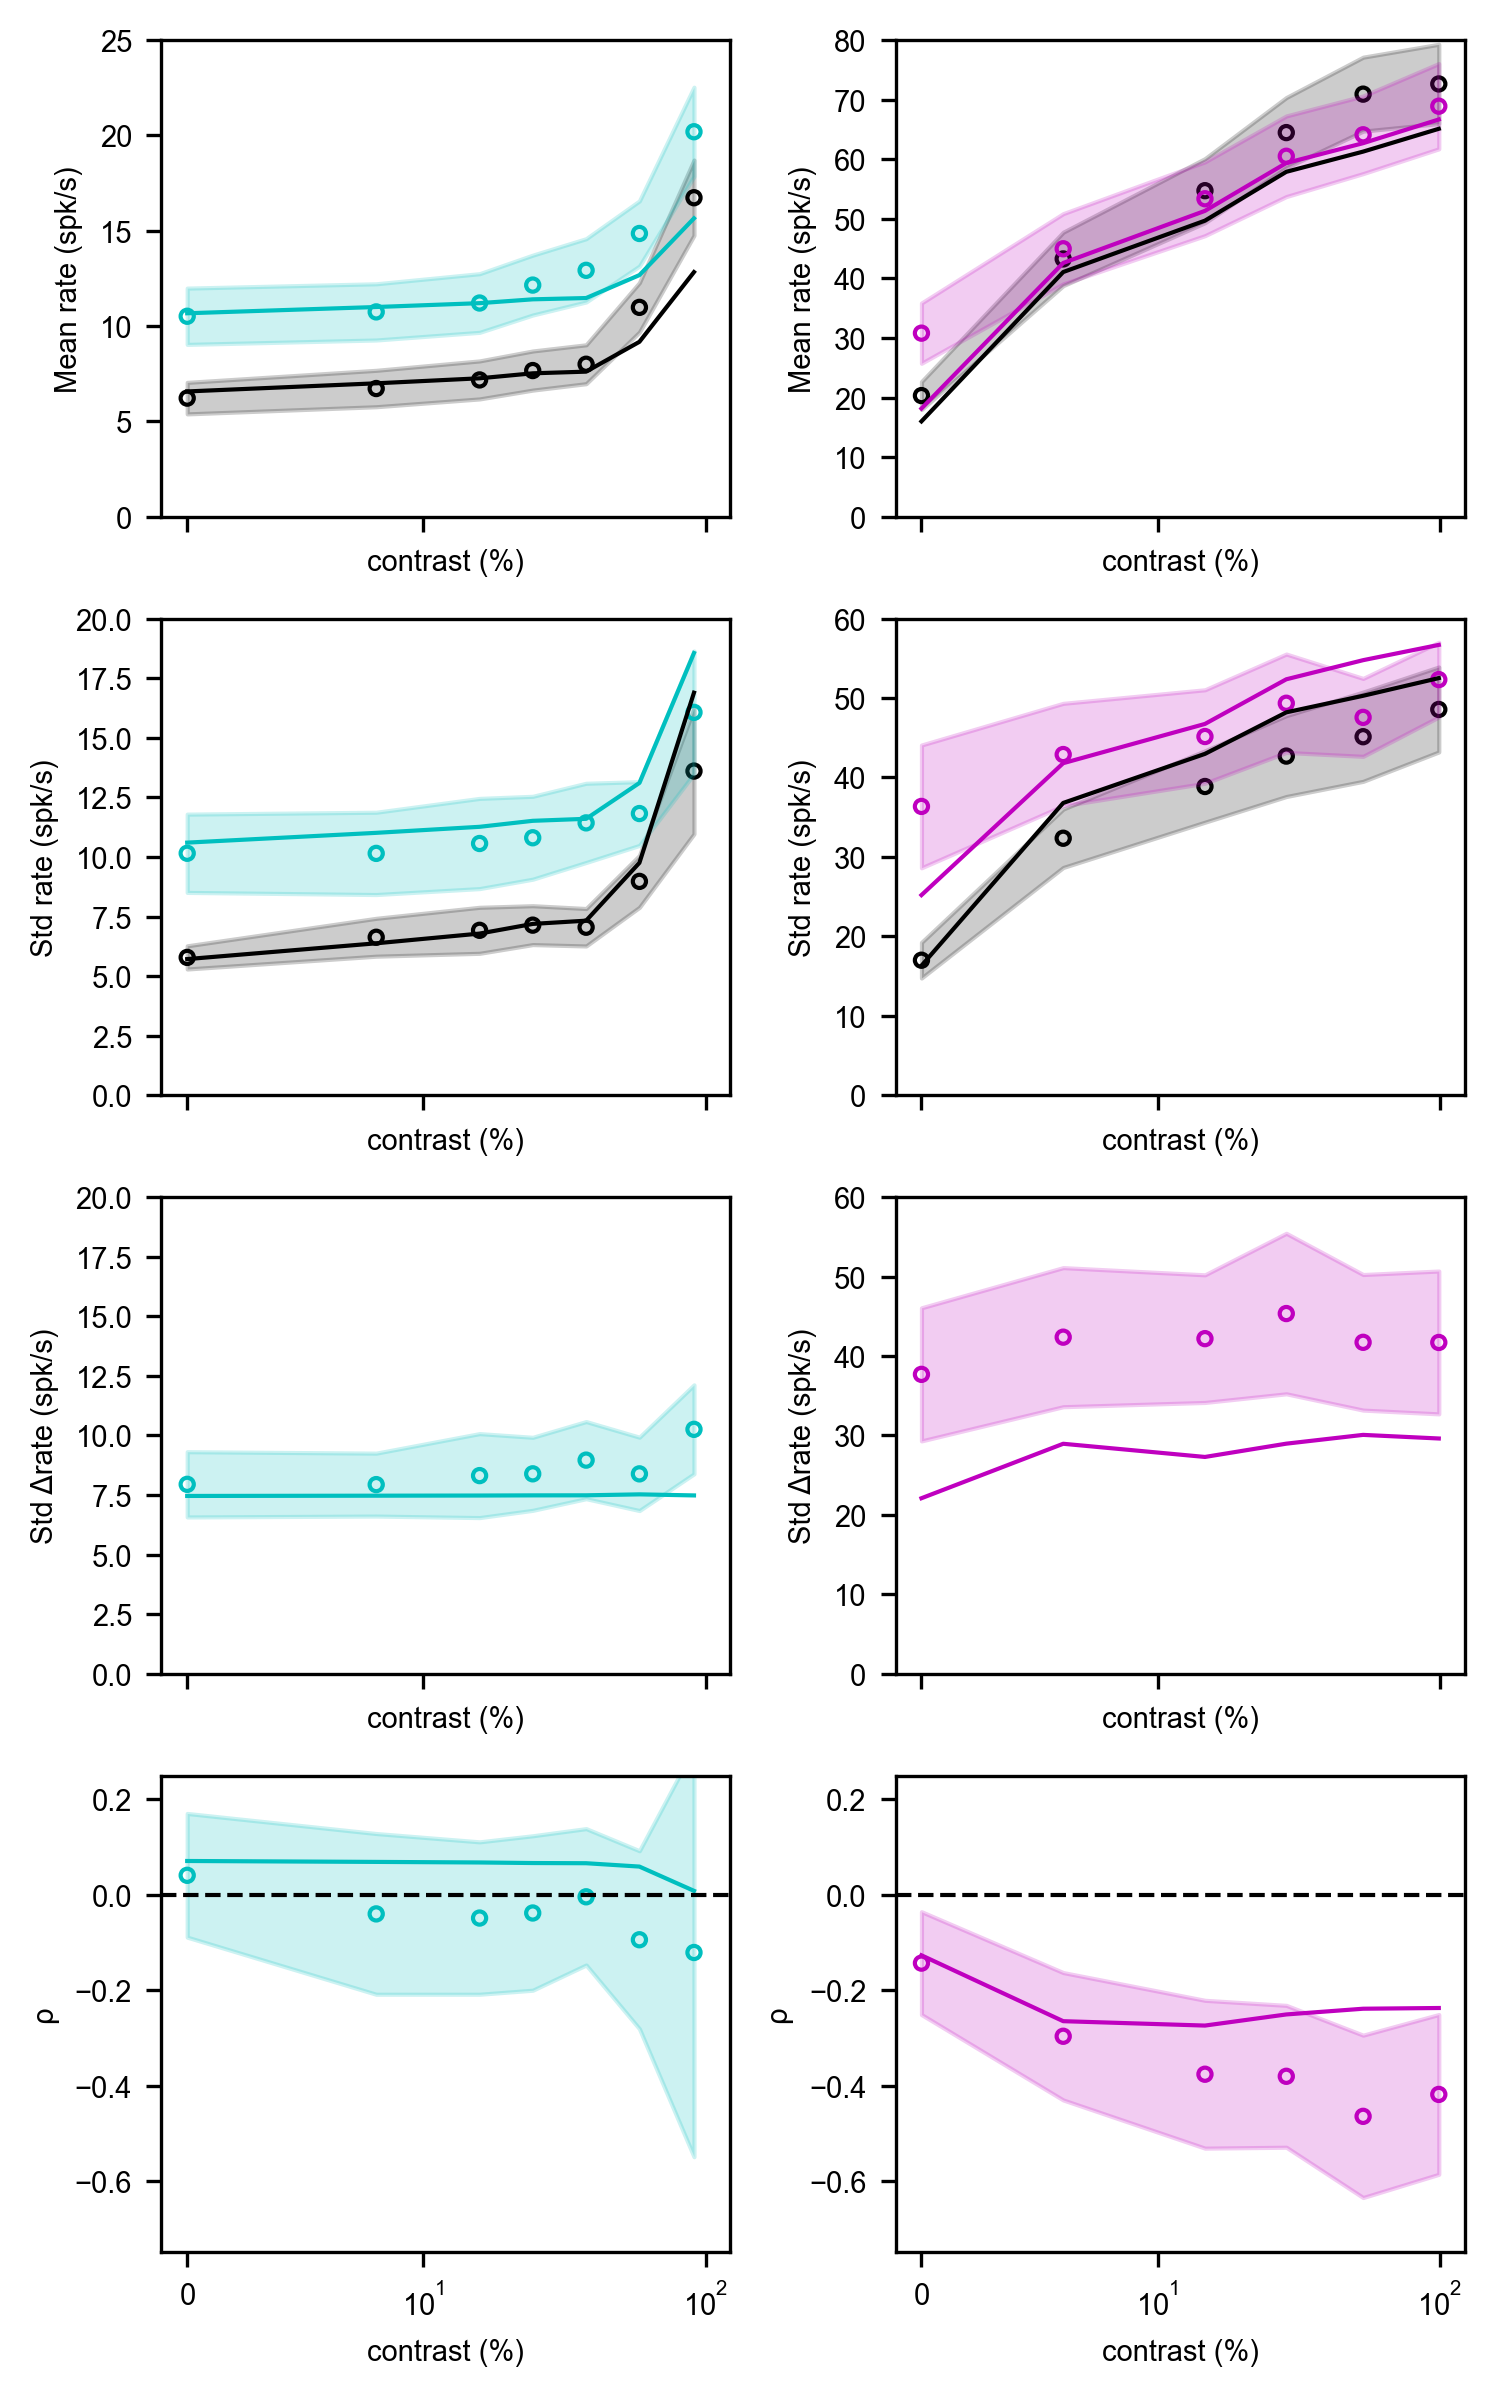

In [39]:
plot_preds([mous_preds.T,monk_preds.T],'./../plots','best_fits',animal='both',
    plot_delta_r=False)

In [20]:
print(np.count_nonzero(mous_costs < 50))
print(np.count_nonzero(monk_costs < 75))

18
15
